In [1]:
import os
#os.listdir("C:/Users/oaona/OneDrive/Desktop/mubaarak")
#j= 0



#for img in os.listdir("C:/Users/oaona/OneDrive/Desktop/mubaarak/"):
 #  j= j+1
  # os.rename("C:/Users/oaona/OneDrive/Desktop/mubaarak/"+img,"C:/Users/oaona/OneDrive/Desktop/mubaarak/"+"mubaarak"+str(j)+".jpg")
  

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [3]:
os.listdir("C:/Users/oaona/OneDrive/Desktop/mubaarak/")

['mubaarak1.jpg',
 'mubaarak10.jpg',
 'mubaarak11.jpg',
 'mubaarak12.jpg',
 'mubaarak13.jpg',
 'mubaarak14.jpg',
 'mubaarak15.jpg',
 'mubaarak16.jpg',
 'mubaarak17.jpg',
 'mubaarak18.jpg',
 'mubaarak19.jpg',
 'mubaarak2.jpg',
 'mubaarak20.jpg',
 'mubaarak21.jpg',
 'mubaarak22.jpg',
 'mubaarak23.jpg',
 'mubaarak24.jpg',
 'mubaarak25.jpg',
 'mubaarak26.jpg',
 'mubaarak27.jpg',
 'mubaarak28.jpg',
 'mubaarak29.jpg',
 'mubaarak3.jpg',
 'mubaarak30.jpg',
 'mubaarak31.jpg',
 'mubaarak32.jpg',
 'mubaarak33.jpg',
 'mubaarak34.jpg',
 'mubaarak35.jpg',
 'mubaarak36.jpg',
 'mubaarak37.jpg',
 'mubaarak38.jpg',
 'mubaarak39.jpg',
 'mubaarak4.jpg',
 'mubaarak40.jpg',
 'mubaarak41.jpg',
 'mubaarak42.jpg',
 'mubaarak43.jpg',
 'mubaarak44.jpg',
 'mubaarak45.jpg',
 'mubaarak46.jpg',
 'mubaarak47.jpg',
 'mubaarak48.jpg',
 'mubaarak49.jpg',
 'mubaarak5.jpg',
 'mubaarak50.jpg',
 'mubaarak51.jpg',
 'mubaarak52.jpg',
 'mubaarak53.jpg',
 'mubaarak54.jpg',
 'mubaarak55.jpg',
 'mubaarak56.jpg',
 'mubaarak57.jpg'

In [13]:
img = plt.imread("C:/Users/oaona/OneDrive/Desktop/mubaarak/water_coins.jpg")

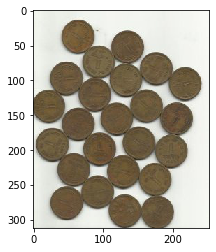

In [14]:
imgplot = plt.imshow(img)


In [15]:
#img = cv2.imread('coins.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)

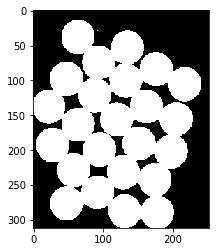

In [17]:
plt.imshow(thresh, "gray")

In [21]:
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)

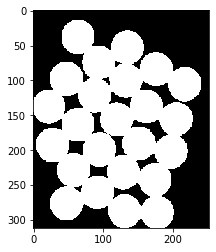

In [22]:
plt.imshow(opening, "gray")

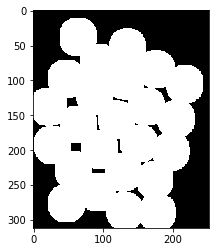

In [23]:
sure_bg = cv2.dilate(opening,kernel,iterations=3)
plt.imshow(sure_bg, "gray")

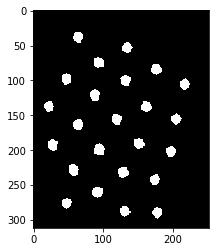

In [24]:
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)
plt.imshow(sure_fg, "gray")

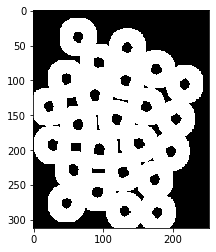

In [25]:
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
plt.imshow(unknown, "gray")

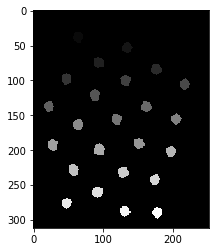

In [27]:
ret, markers = cv2.connectedComponents(sure_fg)
plt.imshow(markers, "gray")

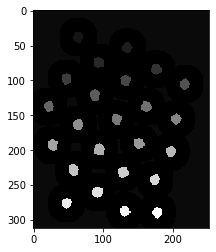

In [28]:
# Add one to all labels so that sure background is not 0, but 1
markers = markers+1

# Now, mark the region of unknown with zero
markers[unknown==255] = 0

plt.imshow(markers, "gray")

In [35]:
img.flags
#img.setflags(write=1)

ValueError: cannot set WRITEABLE flag to True of this array

In [36]:
img.setflags(write=1)

ValueError: cannot set WRITEABLE flag to True of this array

In [33]:
markers = cv2.watershed(img,markers)
img[markers == -1]= [255,0,0]

ValueError: assignment destination is read-only

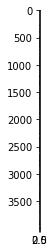

In [32]:
#img[markers == -1]
plt.imshow(img[markers == -1], "gray")

In [10]:
##################

In [4]:
img2 = cv2.imread("C:/Users/oaona/OneDrive/Desktop/mubaarak/mubaarak11.jpg")
plt.imshow(img2)

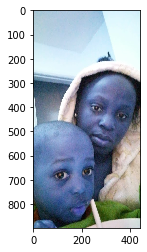

In [14]:
plt.imshow(img2)

In [5]:
Z = img2.reshape((-1,3))

In [8]:
img2.shape

(899, 443, 3)

In [9]:
Z.shape

(398257, 3)

In [11]:
Z = np.float32(Z)


In [13]:
Z[1,2]

207.0

In [15]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [16]:
K = 8
ret,label,center=cv2.kmeans(Z,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

In [ ]:
center = np.uint8(center)

In [17]:
res = center[label.flatten()]
res2 = res.reshape((img2.shape))

cv2.imshow('res2',res2)

TypeError: unhashable type: 'numpy.ndarray'

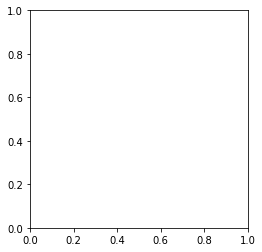

In [19]:
plt.imshow('res2', res2)

In [ ]:
res = center[label.flatten()]
res2 = res.reshape((img2.shape))

cv2.imshow('res2',res2)
cv2.waitKey(0)
cv2.destroyAllWindows()

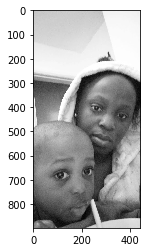

In [12]:
plt.imshow(img2, cmap="gray")

In [13]:
img2.shape

(899, 443)

In [14]:
img_new= cv2.resize(img2, (250, 250))

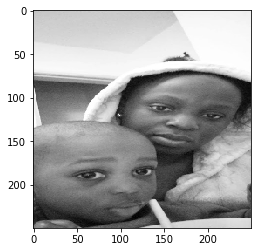

In [15]:
plt.imshow(img_new, cmap="gray")

In [16]:
t, threshIMG = cv2.threshold(img_new,250,250,cv2.THRESH_BINARY)

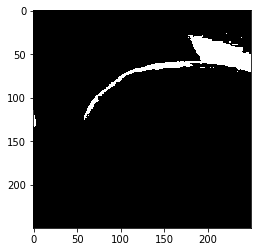

In [17]:
plt.imshow(threshIMG, "gray")

In [18]:
th3 = cv2.adaptiveThreshold(img_new,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)

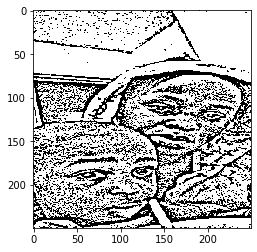

In [19]:
plt.imshow(th3, "gray")

In [16]:
threshIMG[150,]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [ ]:
#####################

In [34]:
img3 = cv2.imread("C:/Users/oaona/OneDrive/Desktop/mubaarak/mubaarak9.jpg",1)

In [35]:
gray=cv2.cvtColor(img3,cv2.COLOR_BGR2GRAY)

In [36]:
ok= cv2.imshow('gray_image',gray)

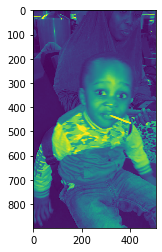

In [37]:
plt.imshow(gray)

In [1]:
print(7/0)

ZeroDivisionError: division by zero

In [4]:

for k in [1,2,3]:
    try:
        w= k+2
    finally:
        print("Allah")

Allah
Allah
Allah


In [1]:
import sqlite3

In [2]:
conn= sqlite3.connect("tutorial.db")

In [3]:
c= conn.cursor()

In [8]:
conn= sqlite3.connect("tutorial.db")
c= conn.cursor()


def create_table():
   c.execute("CREATE TABLE IF NOT EXISTS employees (first TEXT, last TEXT, pay INTEGER)")

def data_entry():
    c.execute("INSERT INTO employees VALUES('ab', 'ac', 23)")
    conn.commit()
    c.close()
    conn.close()

In [9]:
create_table()
data_entry()

In [5]:
os.listdir("C:/Users/oaona/Desktop/stamp.jpg")

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:/Users/oaona/Desktop/stamp.jpg'

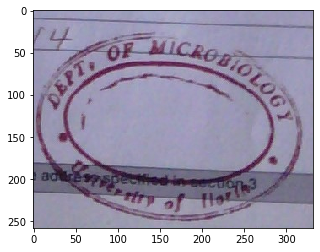

In [6]:
img2 = cv2.imread("C:/Users/oaona/OneDrive/Desktop/stamp.jpg")
plt.imshow(img2)

In [7]:
RGB_img = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

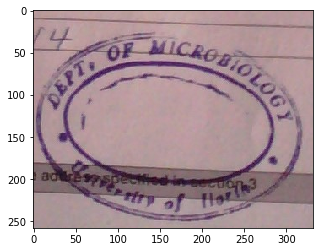

In [8]:
plt.imshow(RGB_img)

In [9]:
pixel_values = RGB_img.reshape((-1, 3))

In [10]:
pixel_values.shape

(85656, 3)

In [11]:
pixel_values = np.float32(pixel_values)

In [12]:
pixel_values.shape

(85656, 3)

In [16]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)

In [108]:
k = 3
_, labels, (centers) = cv2.kmeans(pixel_values, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)

In [109]:
centers = np.uint8(centers)

In [111]:
centers.shape

(3, 3)

In [86]:
labels = labels.flatten()

In [113]:
len(labels)

85656

In [87]:
segmented_image = centers[labels.flatten()]

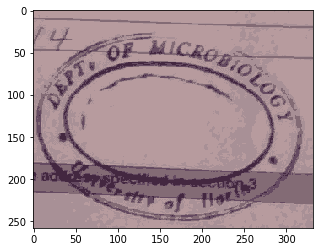

In [88]:
segmented_image = segmented_image.reshape(RGB_img.shape)
# show the image
plt.imshow(segmented_image)
plt.show()

In [100]:
masked_image = np.copy(RGB_img)
# convert to the shape of a vector of pixel values
masked_image = masked_image.reshape((-1, 3))
# color (i.e cluster) to disable
cluster = 0
masked_image[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image = masked_image.reshape(RGB_img.shape)
# show the image
#plt.imshow(masked_image)
#plt.show()

In [107]:
masked_image1 = np.copy(RGB_img)
cluster = 2
masked_image1[labels == cluster] = [0, 0, 0]
# convert back to original shape
masked_image1 = masked_image1.reshape(masked_image.shape)
plt.imshow(masked_image1)
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 258 but corresponding boolean dimension is 85656

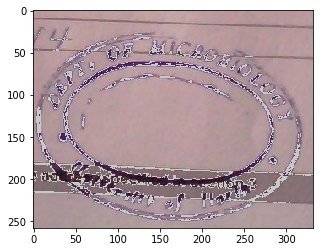

In [80]:
masked_image[np.where((masked_image==[0,0,0]).all(axis=2))] = [200,200,200]
plt.imshow(masked_image)
plt.show()